# Calgary Crime Data Analysis and Neural Network Prediction

The aim of this project is to use the Crime and Disorder Data provided by the City of Calgary's data website to analyze the data and predict the number of crimes that will occured in the future. The data is from 2018 to 2024 and contains the number of crimes that occured in Calgary for each minth. After throughly analyzing the data. I wi;; be building a neural network model and optimizing it to predict the number of crimes that will occur in the future.

## Data Dictionary

| Column Name | Description |
| --- | --- |
|Community Name| The name of the community in Calgary|
|Category| The type of crime that occurred|
|Crime Count| The number of crimes that occurred in that month|
|Year| The year the crime occurred|
|Month| The month the crime occurred|

## Strategy
1. Loading the data and understanding the data
2. Data Preprocessing - cleaing the data and preparing it for analysis
3. Exploratory Data Analysis - Analyzing the data to understand the trends and patterns
4. Building a Neural Network Model
5. Optimizing the model
6. Training the model
7. Predicting the number of crimes that will occur in the future

In [14]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\MaestroCom\25 Data-Science-Projects-by SUKHMAN-SINGH\Data-Science-Projects-main\Calgary Crime Data Analysis and Neural Network Model\Community_Crime_Statistics_20240522.csv')
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


Here the is the representation of first 5 records of the data, which gives a brief information bout the data since the dataset is alphabetically sorted by the community name, the data is not in a chronological order.


## Data Preprocessing

In [18]:
# shape of the dataset
df.shape

(70661, 5)

Here we have bearly 70661 and 5 columns. Therefore we have enough data for preparing an analysis and developing a model for prediction.

In [19]:
# Checking for missing values
df.isnull().sum()

Community      0
Category       0
Crime Count    0
Year           0
Month          0
dtype: int64

The dataset is pretty and not have any missing values.

In [20]:
# Checking for the datatypes
df.dtypes

Community      object
Category       object
Crime Count     int64
Year            int64
Month           int64
dtype: object

Making sure that the columns have correct datatype, before I proceed with the analysis.

In [21]:
# Descriptive statistics
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


## Exploratory Data Analysis

In the exploratory data analysis. I will be analyzing the data to undestand the trends and patterns in the data. Through this analysis, I will be able to undestand the trends and patterns in the data. Through this analysis, I will be able to understand the data better and build a better model for prediction.

### Community Distribusion

Text(0, 0.5, '')

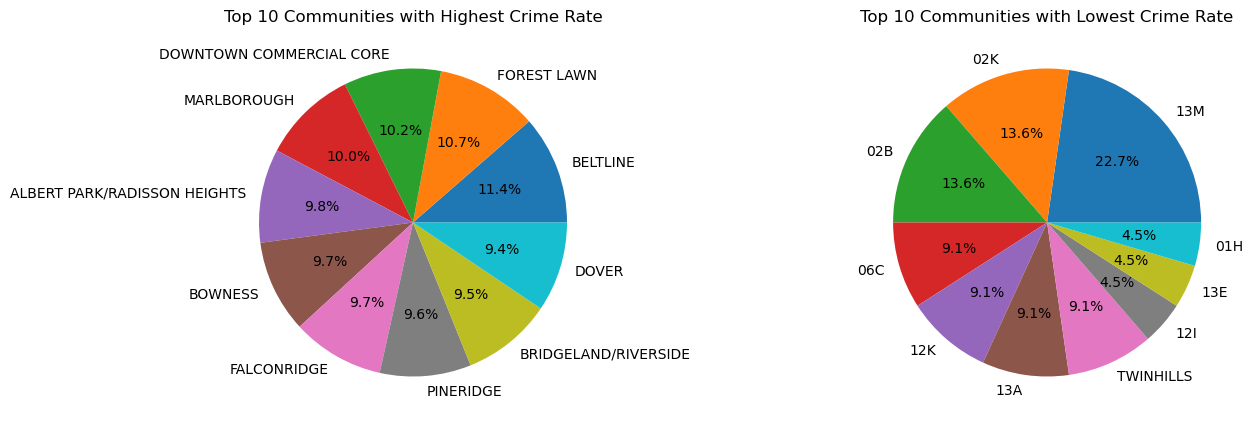

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# Top 10 Communities with Highest Crime Rate
df['Community'].value_counts().head(10).plot.pie(autopct='%1.1f%%', ax = ax[0])
ax[0].set_title('Top 10 Communities with Highest Crime Rate')
ax[0].set_ylabel('')

#Top 10 Communities with Lowest Crime Rate
df['Community'].value_counts().tail(10).plot.pie(autopct='%1.1f%%', ax = ax[1])
ax[1].set_title('Top 10 Communities with Lowest Crime Rate')
ax[1].set_ylabel('')

The chart you shared consists of two pie charts comparing communities with the highest and lowest crime rates: ### 1. **Left Chart - "Top 10 Communities with the Highest Crime Rates"**: - Shows the communities with the highest crime rates.
- Each segment of the pie chart shows the percentage of crime contributed to each community.
- The community with the highest crime rate is **Beltline** (11.4%).
- Other communities with near-average crime rates include: - **Forest Lawn** (10.7%) - **Downtown Commercial Core** (10.2%) - **Marlborough** (10.0%) - **Albert Park/Radisson Heights** (9.8%) - **Bowness** and **Falconridge** (9.7%) ### 2. **Right Chart - "Top 10 Communities with the Lowest Crime Rates"**: - Shows the communities with the lowest crime rates.

- Community **13M** has the lowest crime rate among the others, reaching **22.7%**, significantly higher than other communities in this category.
- Other communities with relatively low crime rates are similar, for example: - **02K** and **02B** (13.6%) - Communities such as **12K**, **12I**, **06C** and **Twinhills** show similar contributions of around 9.1% to 9.5%.
- Communities with very low crime rates, namely **01H** and **13E** (4.5%).

### Conclusion: - This pie chart helps to give an idea of ​​which communities have the highest and lowest crime rates.
- Communities with high crime rates tend to have a more even percentage than communities with low crime rates, where one community dominates.

### Crime Category Distribution

Text(0, 0.5, '')

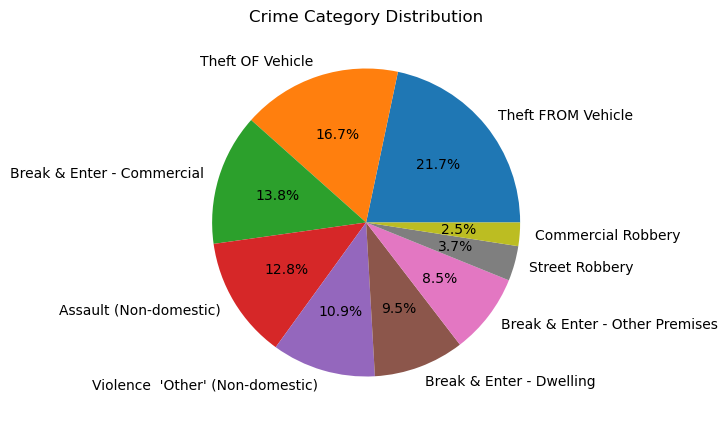

In [25]:
plt.figure (figsize=(5, 5))
df['Category'].value_counts ().plot.pie(autopct = '%1.1f%%')
plt.title ('Crime Category Distribution')
plt.ylabel('')

This pie chart shows the **distribution of crime categories** across different crime types. Each segment shows the percentage of total crimes for each category.

### Category Explanation:
1. **Theft FROM Vehicle (21.7%)**:
- Theft from vehicles dominates, contributing the highest to total crimes (21.7%).

2. **Theft OF Vehicle (16.7%)**:
- Vehicle theft is also the second most significant category with a fairly high percentage (16.7%).

3. **Break & Enter - Commercial (13.8%)**:
- Crimes of forced entry or burglary of commercial property contribute 13.8% of total crimes.

4. **Assault (Non-domestic) (12.8%)**:
- Violence that occurs outside the domestic sphere is also a fairly significant crime (12.8%).

5. **Violence 'Other' (Non-domestic) (10.9%)**:
- Other violence not related to domestic violence contributed around 10.9%.

6. **Break & Enter - Other Premises (9.5%)**:
- Breaking and entering other premises (other than commercial and residential) is also a fairly large crime category (9.5%).

7. **Break & Enter - Dwelling (8.5%)**:
- Breaking into a dwelling or private residence accounted for 8.5%.

8. **Street Robbery (3.7%)**:
- Robbery in the street or public place contributed less (3.7%).

9. **Commercial Robbery (2.5%)**:
- Commercial robbery, such as of a store or office, is the smallest crime category among the others at only 2.5%.

### Conclusions:
- Crimes involving vehicles, either theft from or theft from a vehicle, comprise the majority of the crime distribution with a combined total of over 38%.
- Violence and burglary of property, both commercial and residential, are also significant crime categories.
- Crimes such as commercial and street robberies have smaller contributions compared to other categories.

### Crime Reporting Over the Years

Text(0.5, 1.0, 'Crime Reportings by Year')

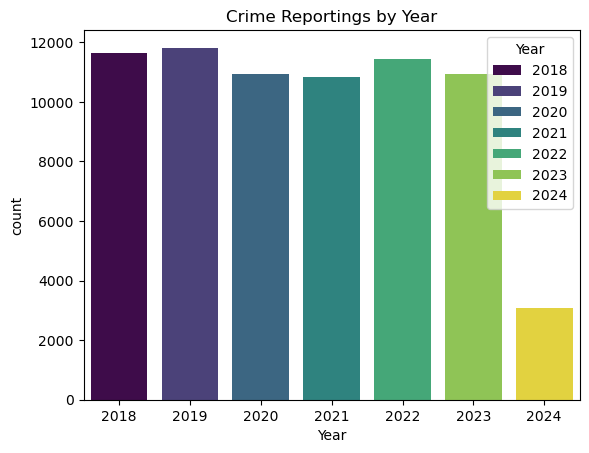

In [26]:
sns.countplot (x = 'Year', data = df, hue = 'Year', palette = 'viridis').set_title ('Crime Reportings by Year')

This bar graph shows the distribution of number of crimes reported in the year. The year 2019 had the highest reportings of crimes followed by 2022 and 2018. The crime reportings in 2024 are less due to limited data till April 2024.

### Crime Reportings by Month

Text(0.5, 1.0, 'Crime Reportings by Month')

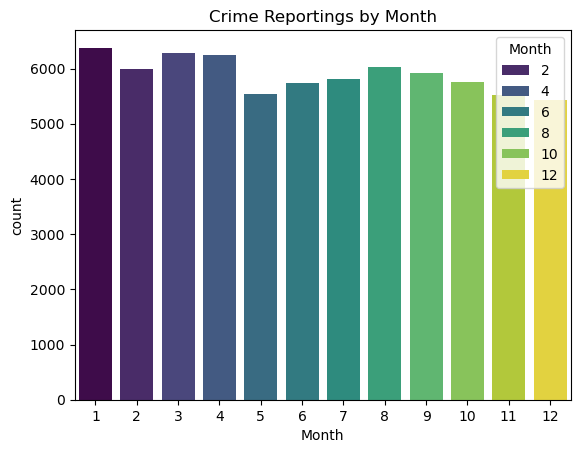

In [27]:
sns.countplot (x = 'Month', data = df, hue = 'Month', palette = 'viridis').set_title ('Crime Reportings by Month')

### Community and Category Analysis

Text(0.5, 1.0, 'Top 5 Most safest Community and Crime Category')

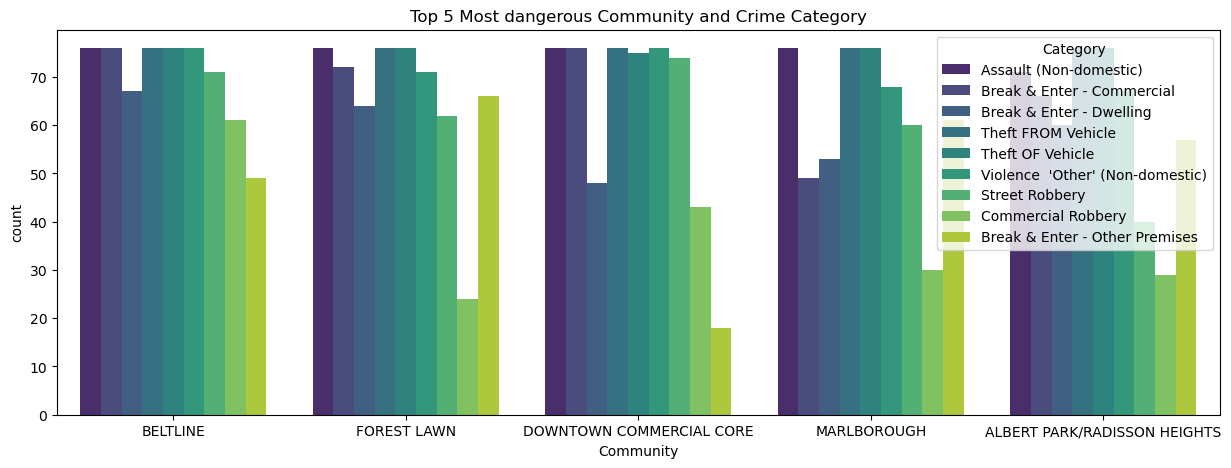

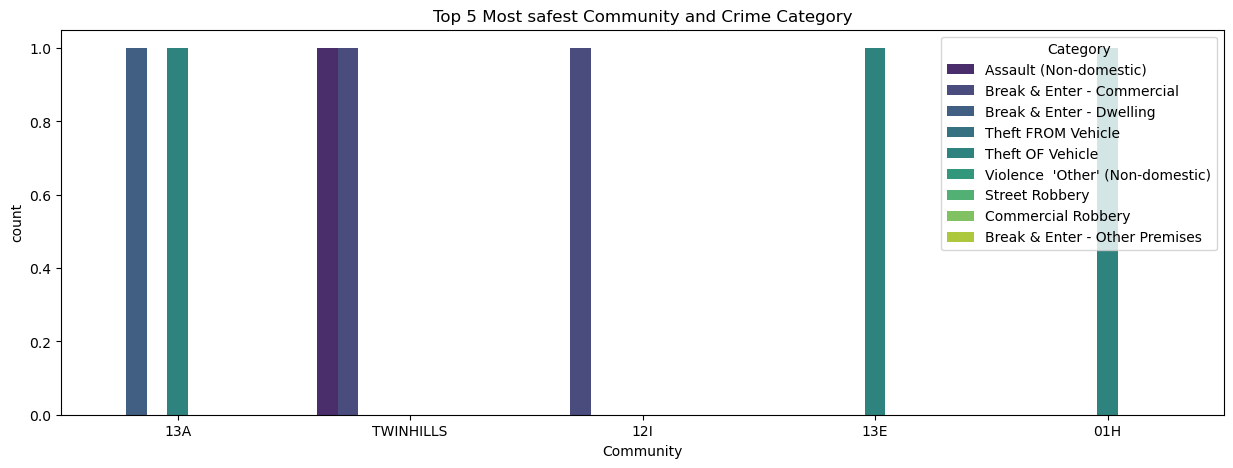

In [30]:
plt.figure (figsize = (15, 5))
sns.countplot (x = 'Community', data = df, hue = 'Category', palette = 'viridis', order = df['Community'].value_counts().head(5).index).set_title ('Top 5 Most dangerous Community and Crime Category')
sns.move_legend(plt.gca(), 'upper right')
plt.figure (figsize = (15, 5))
sns.countplot (x = 'Community', data = df, hue = 'Category', palette = 'viridis', order = df['Community'].value_counts().tail(5).index).set_title('Top 5 Most safest Community and Crime Category')

The image shows two bar charts comparing the crime categories in different communities. Here's a breakdown:

1. **Top Bar Chart (Top 5 Most Dangerous Communities and Crime Category)**:
   - The chart displays crime counts across five communities: Beltline, Forest Lawn, Downtown Commercial Core, Marlborough, and Albert Park/Radisson Heights.
   - The bars are color-coded by different crime categories such as **Assault (Non-domestic), Break & Enter (Commercial), Theft of Vehicle**, and more, with a legend on the right.
   - Each community has multiple colored bars representing various crimes. The taller the bar, the higher the number of occurrences for that crime in the respective community.
   - For example, Forest Lawn and Marlborough seem to have higher crime rates across most categories.

2. **Bottom Bar Chart (Top 5 Safest Communities and Crime Category)**:
   - This chart shows the top 5 safest communities: 13A, Twinhills, 121, 13E, and Q14.
   - The crime counts are much lower than in the top chart, with many categories showing zero occurrences.
   - Only a few bars appear in this chart, highlighting how few crimes occur in these communities compared to the dangerous ones.

In summary, the image compares crime rates across two sets of communities, emphasizing that the second set experiences significantly fewer crimes.

### Year and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

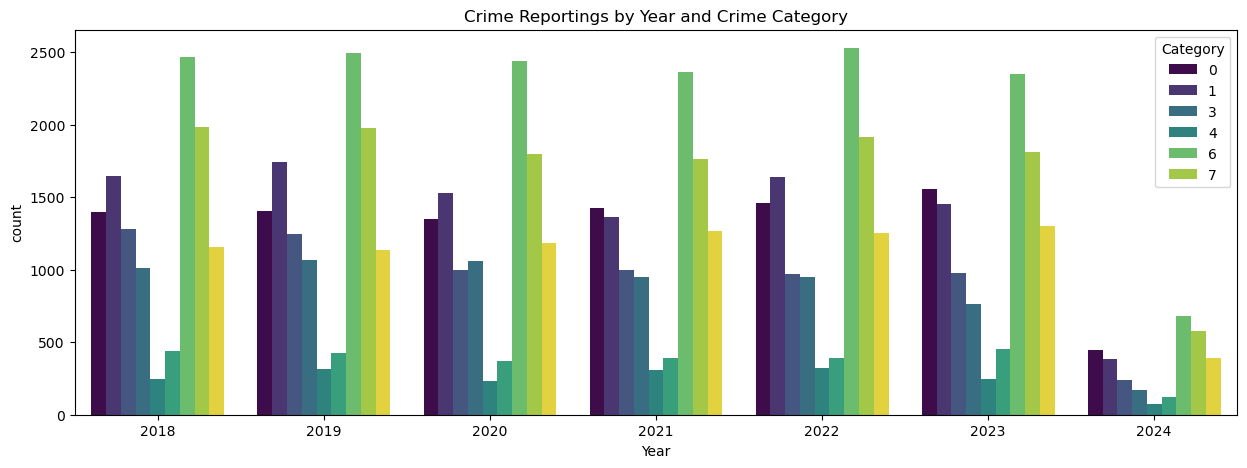

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Year', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')

The figure is a bar chart showing the number of reported crimes by year and crime category. Overall, the number of reported crimes tends to increase from year to year. Crime category 6 has the highest number of reports, followed by crime categories 0, 7, and 1. Crime categories 3, 4, and 2 have the lowest number of reports. There were more reported crimes in 2022 than in any other year, and a sharp decline in 2024.

### Month and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Month and Crime Category')

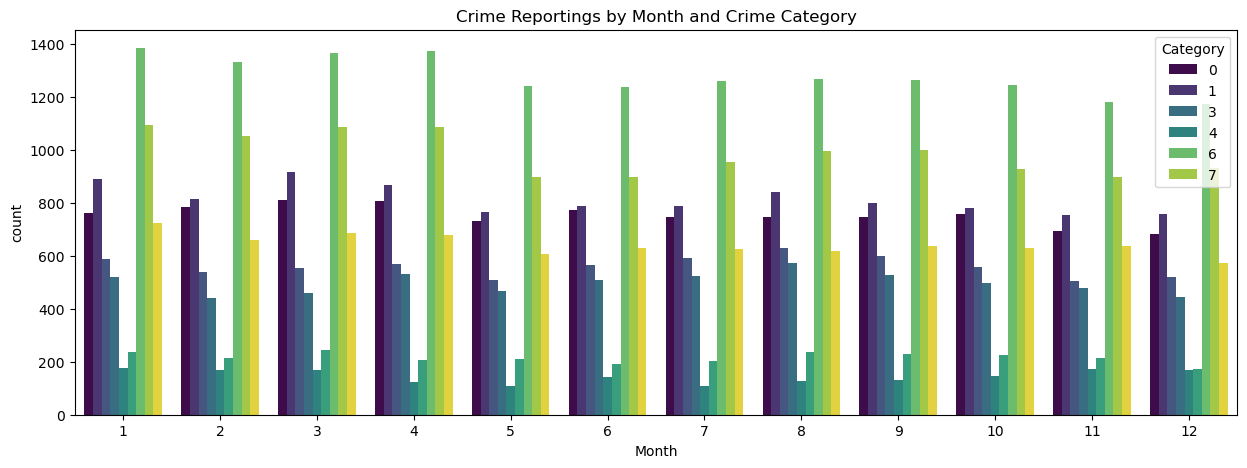

In [38]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Month', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Month and Crime Category')

The figure shows the number of reported crimes per year and the crime categories in the city. The crime categories are represented by different colors:

Dark purple - Category 0  
Light purple - Category 1  
Dark blue - Category 3  
Light blue - Category 4  
Light green - Category 6  
Yellow - Category 7  
We can see that overall, the number of reported crimes has decreased in recent years. We can also see that certain crime categories are more common than others, such as categories 6 and 7.

## Data Preprocessing Part 2

In [31]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding Object
le = LabelEncoder ()

# Object type columns
object_type_columns = df.select_dtypes(include = 'object').columns

# Label Encoding
for col in object_type_columns :
    df[col] = le.fit_transform (df[col])
df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


## Building a Neural Network Model

In [32]:
# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length)].to_numpy()
        y = data.iloc[i + seq_length]['Crime Count']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [33]:
seq_length = 3
X, y = create_sequences(df, seq_length)

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Building and Training the LSTM Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [36]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=16)

C:\Users\MaestroCom\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 903.4688 - val_loss: 11.0631
Epoch 2/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 11.7641 - val_loss: 5.1969
Epoch 3/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.8469 - val_loss: 4.8577
Epoch 4/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 6.4590 - val_loss: 5.0194
Epoch 5/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.4487 - val_loss: 5.9871
Epoch 6/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.9892 - val_loss: 5.4979
Epoch 7/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 6.7629 - val_loss: 4.9757
Epoch 8/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.7744 - val_loss: 5.4655
Epoch 9/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.3339 - val_loss: 4.8673
Epoch 10/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.3553 - val_loss: 5.5430
Epoch 11/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.6201 - val_loss: 5.0007
Epoch 1

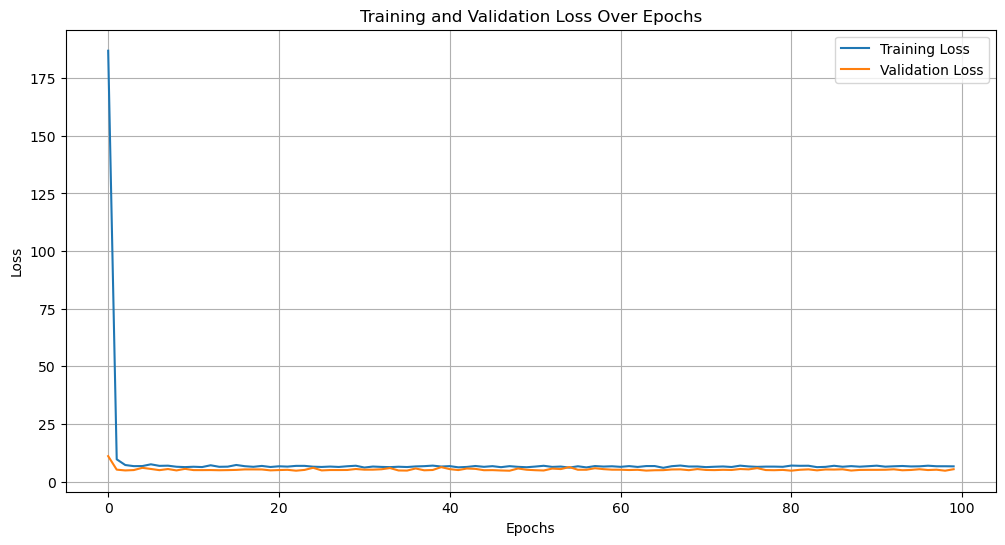

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Predictions
y_pred = model.predict(X_test)


print(f'Predictions: {y_pred.flatten()}')
print(f'True Values: {y_test.flatten()}')

332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3349
Test Loss: 5.649509906768799
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predictions: [3.3927698 2.0920303 2.0920303 ... 3.054086  2.0920303 2.671742 ]
True Values: [2 1 1 ... 1 2 2]


## Model Evaluation

### Actual vs Predicted Values

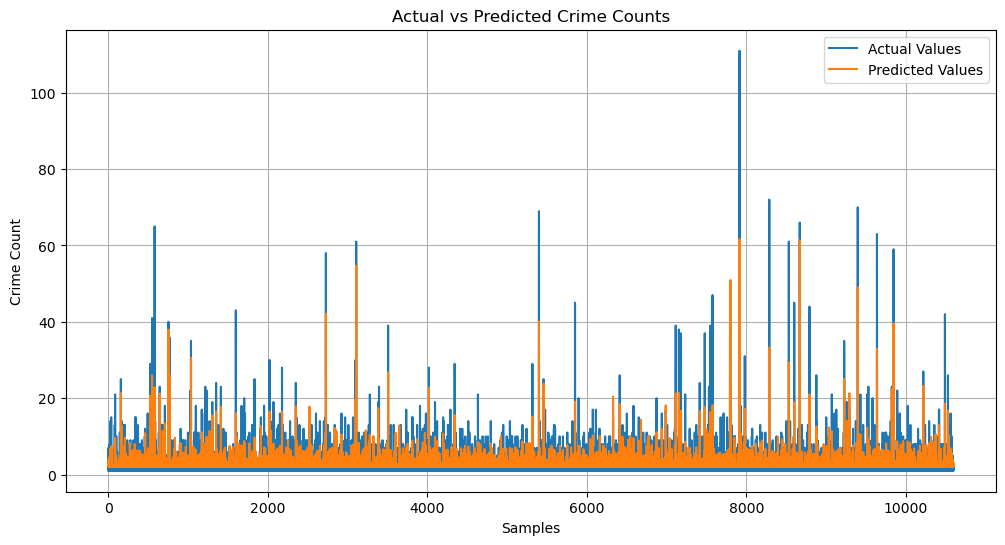

In [41]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

### Residual Plot

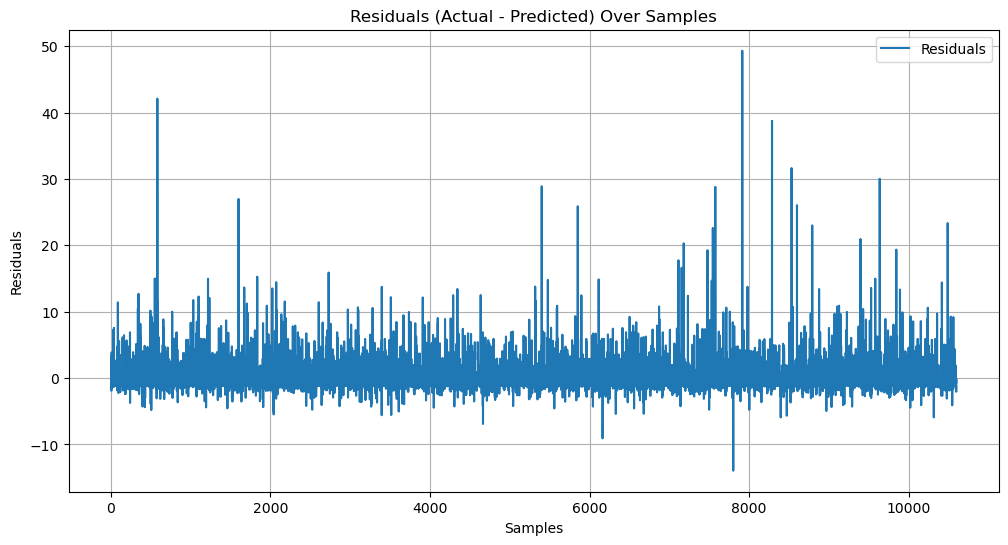

In [42]:
# Calculating residuals
residuals = y_test.flatten() - y_pred.flatten()

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals (Actual - Predicted) Over Samples')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

The figure shows the number of reported crimes per year and the crime categories in New York City. The crime categories are represented by different colors in the bar chart. It can be seen that the most reported crimes are in category 6 in 2022. There is an increasing trend of reported crimes in categories 6 and 7 from 2018 to 2023, but it decreases in 2024. On the other hand, category 0 crimes decrease from 2018 to 2023, then increase in 2024.